<a href="https://www.kaggle.com/code/sakethyalamanchili/eda-on-heart-disease-dataset?scriptVersionId=159409602" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis (EDA) on Heart Disease Dataset

## Objective:
The main goal of this analysis is to enhance my skills in Exploratory Data Analysis (EDA) as a budding enthusiast in the data world. Through this project, I aim to work on, grow, and retain my proficiency in exploring and understanding datasets.

## Feedback Welcome:
I welcome any feedback on the project, as it will greatly contribute to my ongoing learning journey. Feel free to point out errors, suggest improvements, or share insights that can help me refine my EDA skills.

Let's dive into the heart disease dataset and explore the fascinating world of data together!

## Column and Variable Descriptions:
Here's a breakdown of the key columns and their corresponding variables in the dataset:

- **age:** Age of the patient.
- **sex:** Gender of the patient (1=male, 0=female).
- **chest pain type (cp):** Categorized into 4 values.
- **resting blood pressure (trestbps):** The patient's resting blood pressure.
- **serum cholesterol (chol):** The level of cholesterol in the blood, measured in milligrams per deciliter (mg/dl).
- **fasting blood sugar (fbs):** Binary indicator (1 if fasting blood sugar > 120 mg/dl, 0 otherwise).
- **resting electrocardiographic results (restecg):** Categorized into values 0, 1, 2.
- **maximum heart rate achieved (thalach):** The highest heart rate during exercise.
- **exercise-induced angina (exang):** Binary indicator for exercise-induced angina.
- **oldpeak:** ST depression induced by exercise relative to rest.
- **slope:** The slope of the peak exercise ST segment.
- **number of major vessels colored by fluoroscopy (ca):** Ranges from 0 to 3.
- **thal:** Categorized as 0 = normal, 1 = fixed defect, 2 = reversible defect.

The **target** field indicates the presence of heart disease in the patient, with integer values: 0 = no disease, 1 = disease.

# Research Question and Problem Statement

## Research Question:
Determine the factors influencing the presence of heart disease in patients based on various health-related parameters.

## Problem Statement:
In this analysis, we aim to investigate the relationship between demographic and clinical attributes, such as age, gender, chest pain type, blood pressure, cholesterol levels, etc., and the likelihood of a patient having heart disease. The objective is to identify key factors that significantly contribute to the presence or absence of heart disease in the dataset. Through this exploration, we seek to gain insights into the complex interplay of health-related parameters and their impact on the likelihood of heart disease in patients.

This research will not only contribute to a better understanding of the dataset but also provide valuable information for potential predictive modeling and healthcare decision-making.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the Dataset
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.shape

(1025, 14)

* The dataset consists of **1024 rows and 14 columns**, providing a substantial amount of information for analysis. A key positive aspect is the absence of any null values, indicating a clean and complete dataset.

* Although the dataset appears clean, it's essential to further assess data quality. One critical check involves **looking for duplicate entries**. Duplicates, if present, could lead to biased or inaccurate results. Therefore, a thorough examination for any duplicate rows will be performed in the next step.

In [9]:
data.duplicated().sum()

723

In [10]:
# Display the first n duplicated rows
n = data.duplicated().sum()  # replace with the desired number
duplicated_rows = data[data.duplicated()].head(n)
duplicated_rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
duplicated_rows.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
82,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
84,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1


In [12]:
duplicated_rows.sort_values(by='age').head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
699,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
298,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
912,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0


In [13]:
duplicated_rows.shape

(723, 14)

* We discovered **723 duplicate rows** in our assessment. To maintain the integrity of our analysis, it is important to address these duplicates promptly. Consequently, we will proceed by **removing the duplicate entries**.

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(302, 14)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Let's classify numerical and catergorical data from dataset to avoid confusion in the Analysis

In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
categorical_values = []
numerical_values = []

for column in data.columns:
    if data[column].nunique() <10:
        categorical_values.append(column)
    else:
        numerical_values.append(column)

In [22]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [23]:
numerical_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Distribution Analysis of Numerical Data

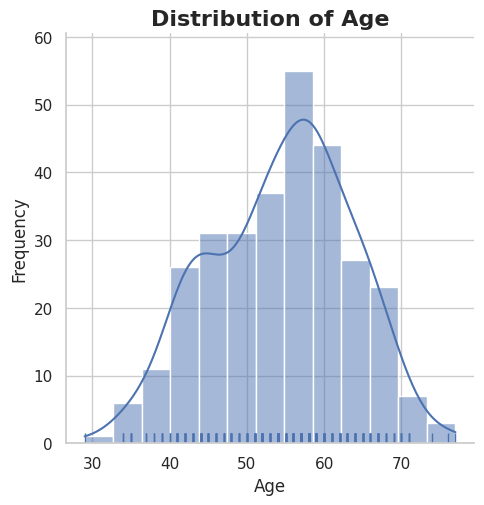

In [24]:
# Distribution of Age

sns.set(style="whitegrid")
sns.displot(data['age'], kde=True, rug=True)
plt.title('Distribution of Age',fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

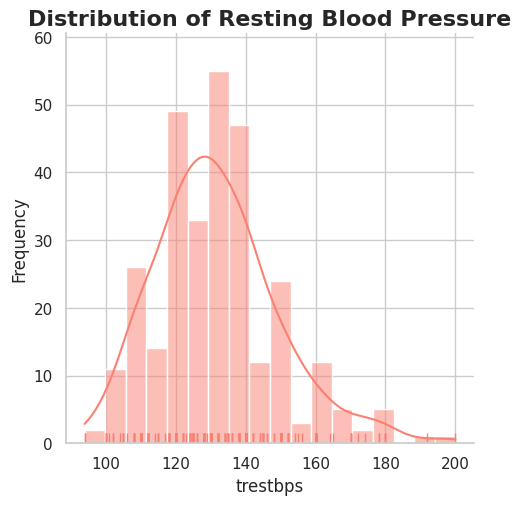

In [25]:
# Distribution of Resting Blood Pressure

sns.set(style="whitegrid")
sns.displot(data['trestbps'], kde=True, rug=True, color='salmon')
plt.title('Distribution of Resting Blood Pressure', fontsize=16, fontweight='bold')
plt.xlabel('trestbps', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

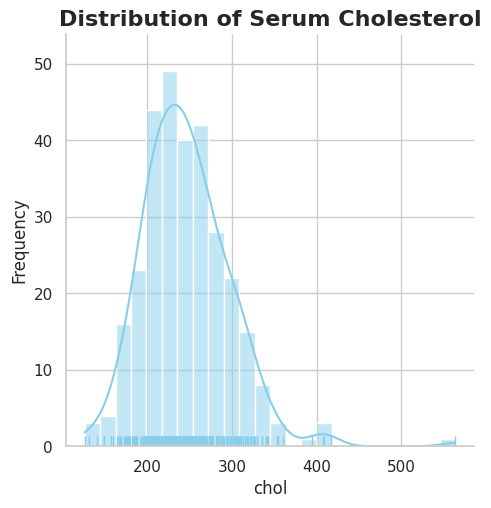

In [26]:
# Distribution of Serum Cholesterol

sns.set(style="whitegrid")
sns.displot(data['chol'], kde=True, rug=True, color='skyblue')
plt.title('Distribution of Serum Cholesterol', fontsize=16, fontweight='bold')
plt.xlabel('chol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

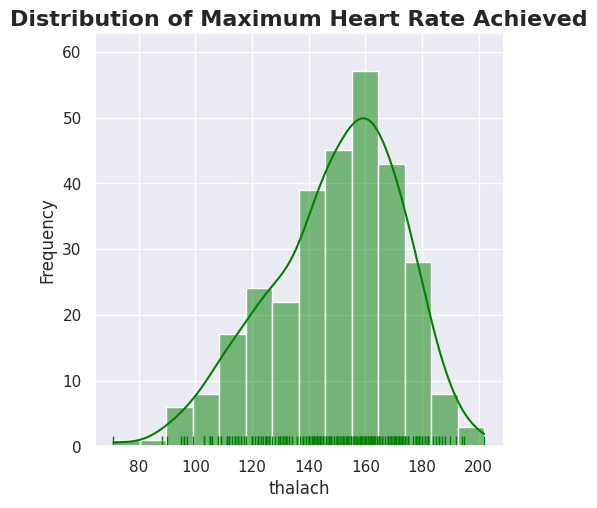

In [27]:
# Distribution of Maximum Heart Rate Achieved

sns.set(style='darkgrid')
sns.displot(data['thalach'], kde=True, rug=True, color='green')
plt.title("Distribution of Maximum Heart Rate Achieved", fontsize=16, fontweight='bold')
plt.xlabel("thalach", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

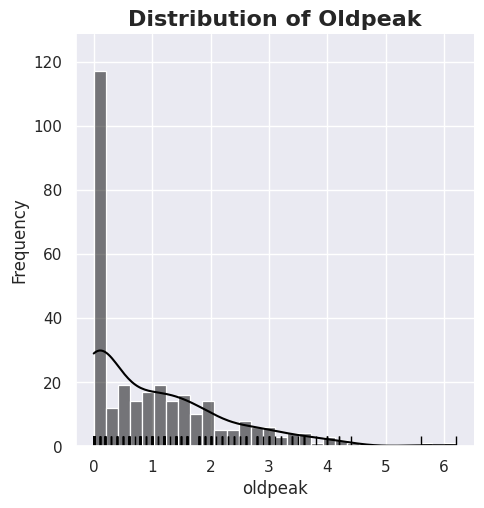

In [28]:
# Distribution of Oldpeak

sns.set(style='darkgrid')
sns.displot(data['oldpeak'], kde=True, rug=True, color='black', bins=30)
plt.title("Distribution of Oldpeak", fontsize=16, fontweight='bold')
plt.xlabel("oldpeak", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.show()

# Distribution Analysis of Categorical Data

In [29]:
for column in categorical_values:
    value_counts = data[column].value_counts()
    print(f"Values and Counts for {column}:\n{value_counts}\n{'-'*50}\n")

Values and Counts for sex:
sex
1    206
0     96
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for cp:
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for fbs:
fbs
0    257
1     45
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for restecg:
restecg
1    151
0    147
2      4
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for exang:
exang
0    203
1     99
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for slope:
slope
2    141
1    140
0     21
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for ca:
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for thal:
thal
2  

To enhance readability and simplify the interpretation of certain columns in our heart disease dataset, we perform **category renaming** on selected binary columns.

1. **Sex Column:**
   - Original: 1 = Male, 0 = Female
   - Renamed: 1 = 'M' (Male), 0 = 'F' (Female)

2. **Target Column (Heart Disease):**
   - Original: 1 = Presence of Heart Disease, 0 = No Heart Disease
   - Renamed: 1 = 'Y' (Yes), 0 = 'N' (No)

3. **Fasting Blood Sugar (fbs) Column:**
   - Original: 1 = Fasting Blood Sugar > 120 mg/dl, 0 = Fasting Blood Sugar <= 120 mg/dl
   - Renamed: 1 = 'Y' (Yes), 0 = 'N' (No)

4. **Exercise-Induced Angina (exang) Column:**
   - Original: 1 = Exercise-Induced Angina Present, 0 = No Exercise-Induced Angina
   - Renamed: 1 = 'Y' (Yes), 0 = 'N' (No)

These changes aim to simplify the representation of these binary categories, making it more easier to understand. It provides clearer communication of insights and findings during data analysis.

In [30]:
data['sex'] = data['sex'].replace({1:'M',0:'F'})
data['target'] = data['target'].replace({1:'Y',0:'N'})
data['fbs'] = data['fbs'].replace({1:'Y',0:'N'})
data['exang'] = data['exang'].replace({1:'Y',0:'N'})

In [31]:
converted_data = ['sex', 'target', 'fbs', 'exang']
for column in converted_data:
    valuecount = data[column].value_counts()
    print(f"The Value and Count of {column}\n{valuecount}\n{'-'*50}")

The Value and Count of sex
sex
M    206
F     96
Name: count, dtype: int64
--------------------------------------------------
The Value and Count of target
target
Y    164
N    138
Name: count, dtype: int64
--------------------------------------------------
The Value and Count of fbs
fbs
N    257
Y     45
Name: count, dtype: int64
--------------------------------------------------
The Value and Count of exang
exang
N    203
Y     99
Name: count, dtype: int64
--------------------------------------------------


In [32]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

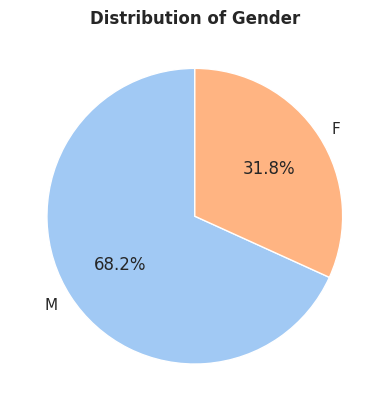

In [33]:
# Distribution of Gender

colors = sns.color_palette("pastel")
plt.pie(data['sex'].value_counts(), labels=data['sex'].unique(), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Gender', fontweight='bold')
plt.show()

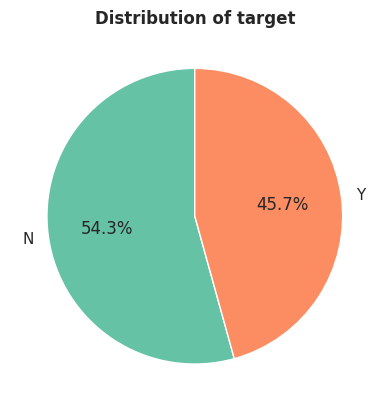

In [34]:
# Distribution of target

colors = sns.color_palette("Set2")
plt.pie(data['target'].value_counts(), labels=data['target'].unique(), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribution of target", fontweight='bold')
plt.show()

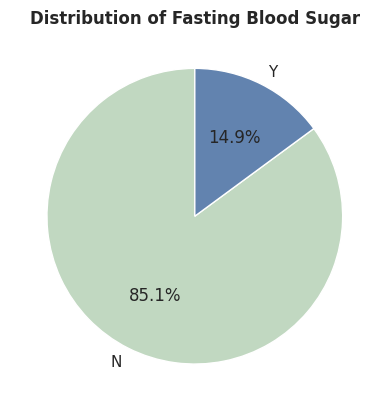

In [35]:
# Distribution of Fasting Blood Sugar

colors=["#c1d8c1", "#6283af"]
plt.pie(data['fbs'].value_counts(), labels=data['fbs'].unique(), colors=colors, startangle=90, autopct="%1.1f%%")
plt.title("Distribution of Fasting Blood Sugar", fontweight='bold')
plt.show()

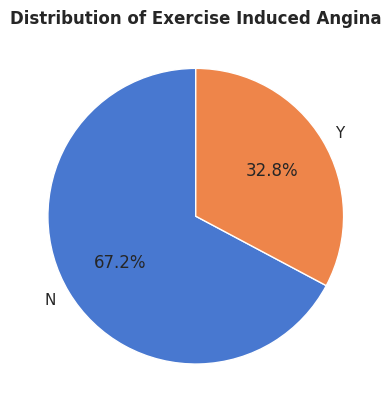

In [36]:
# Distribution of Exercise Induced Angina

colors = sns.color_palette('muted')
plt.pie(data['exang'].value_counts(), labels=data['exang'].unique(), autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Distribution of Exercise Induced Angina", fontweight='bold')
plt.show()

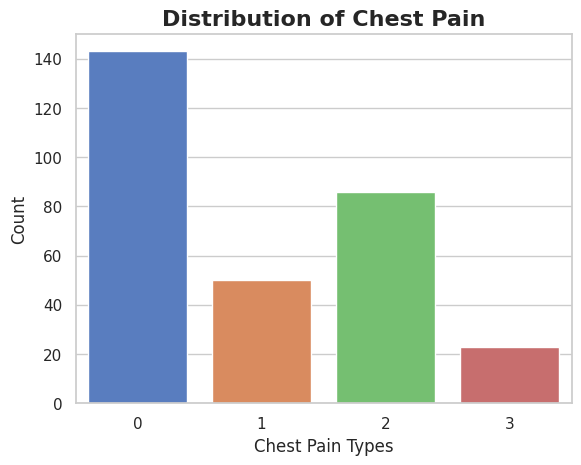

In [37]:
# Distribution of Chest Pain

sns.set(style="whitegrid")
sns.countplot(x='cp', data=data, palette=colors)
plt.title("Distribution of Chest Pain", fontsize=16, fontweight='bold')
plt.xlabel("Chest Pain Types")
plt.ylabel("Count")
plt.show()

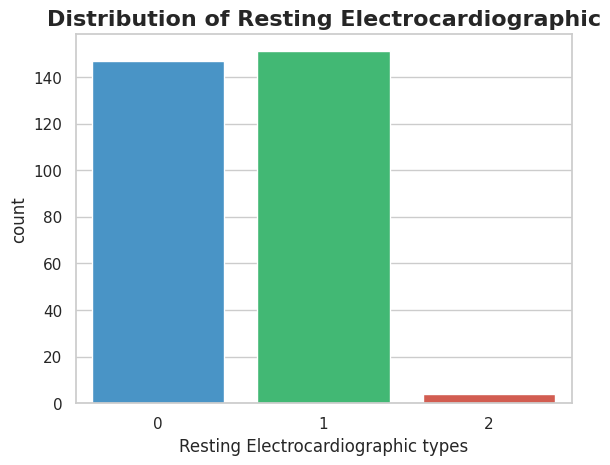

In [38]:
# Distribution of Resting Electrocardiographic

sns.set(style="whitegrid")
colors = ['#3498db', '#2ecc71', '#e74c3c']
sns.countplot(x='restecg', data=data, palette=colors)
plt.title("Distribution of Resting Electrocardiographic", fontsize=16, fontweight='bold')
plt.xlabel("Resting Electrocardiographic types")
plt.show()

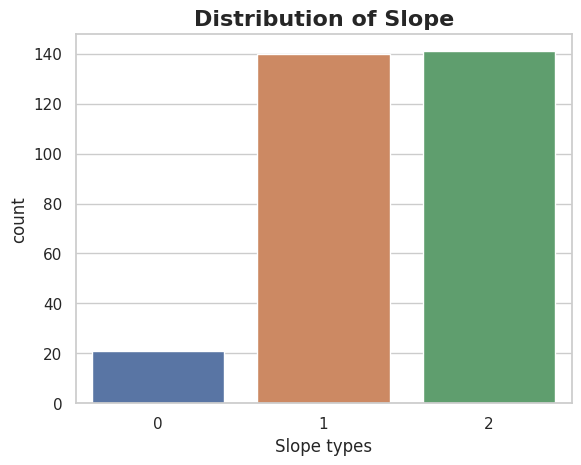

In [39]:
# Distribution of Slope

sns.set(style='whitegrid')
sns.countplot(x='slope', data=data)
plt.title("Distribution of Slope", fontsize=16, fontweight='bold')
plt.xlabel("Slope types")
plt.show()

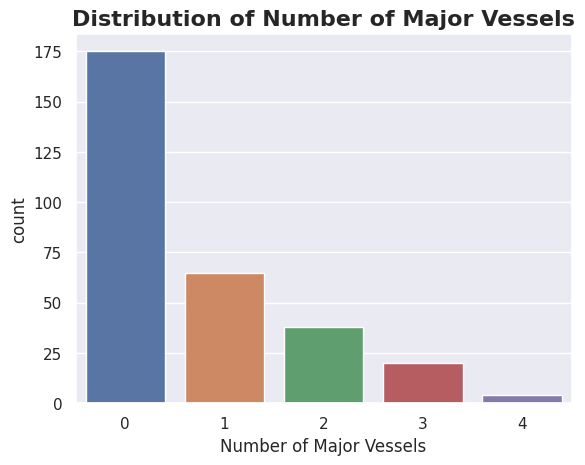

In [40]:
# Distribution of Number of Major Vessels

sns.set(style='darkgrid')
sns.countplot(x='ca', data=data)
plt.title("Distribution of Number of Major Vessels", fontsize=16, fontweight='bold')
plt.xlabel("Number of Major Vessels")
plt.show()

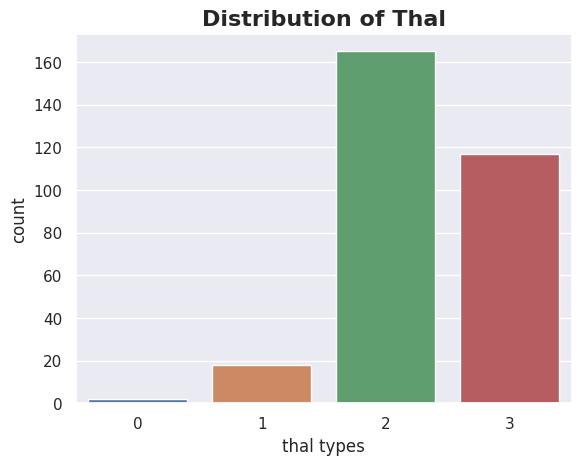

In [41]:
# Distribution of Thal

sns.set(style='darkgrid')
sns.countplot(x='thal', data=data)
plt.title("Distribution of Thal", fontsize=16, fontweight='bold')
plt.xlabel("thal types")
plt.show()

# Distribution of a Numerical variable across different Categories

In [42]:
numerical_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [43]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

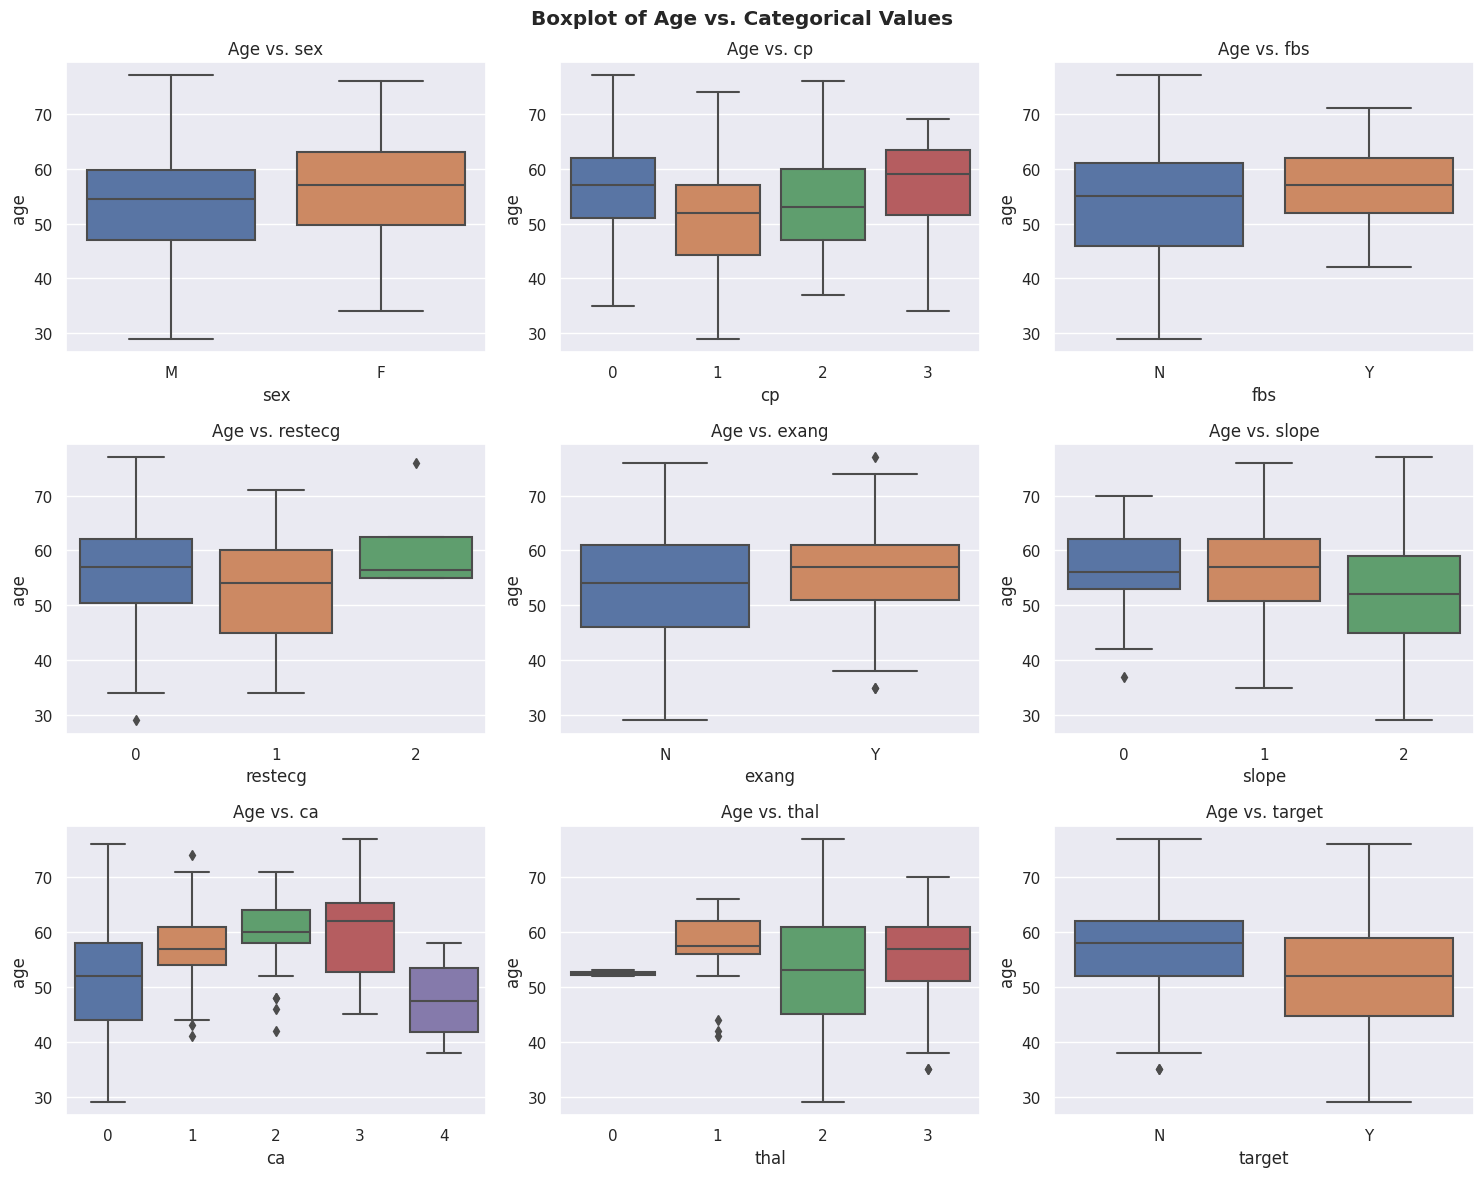

In [44]:
# Age vs. Categorical Values

sns.set(style='darkgrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.boxplot(x=cat_value, y='age', data=data, ax=axes[i])
    axes[i].set_title(f'Age vs. {cat_value}')

plt.suptitle("Boxplot of Age vs. Categorical Values", fontweight='bold')
plt.tight_layout()
plt.show()

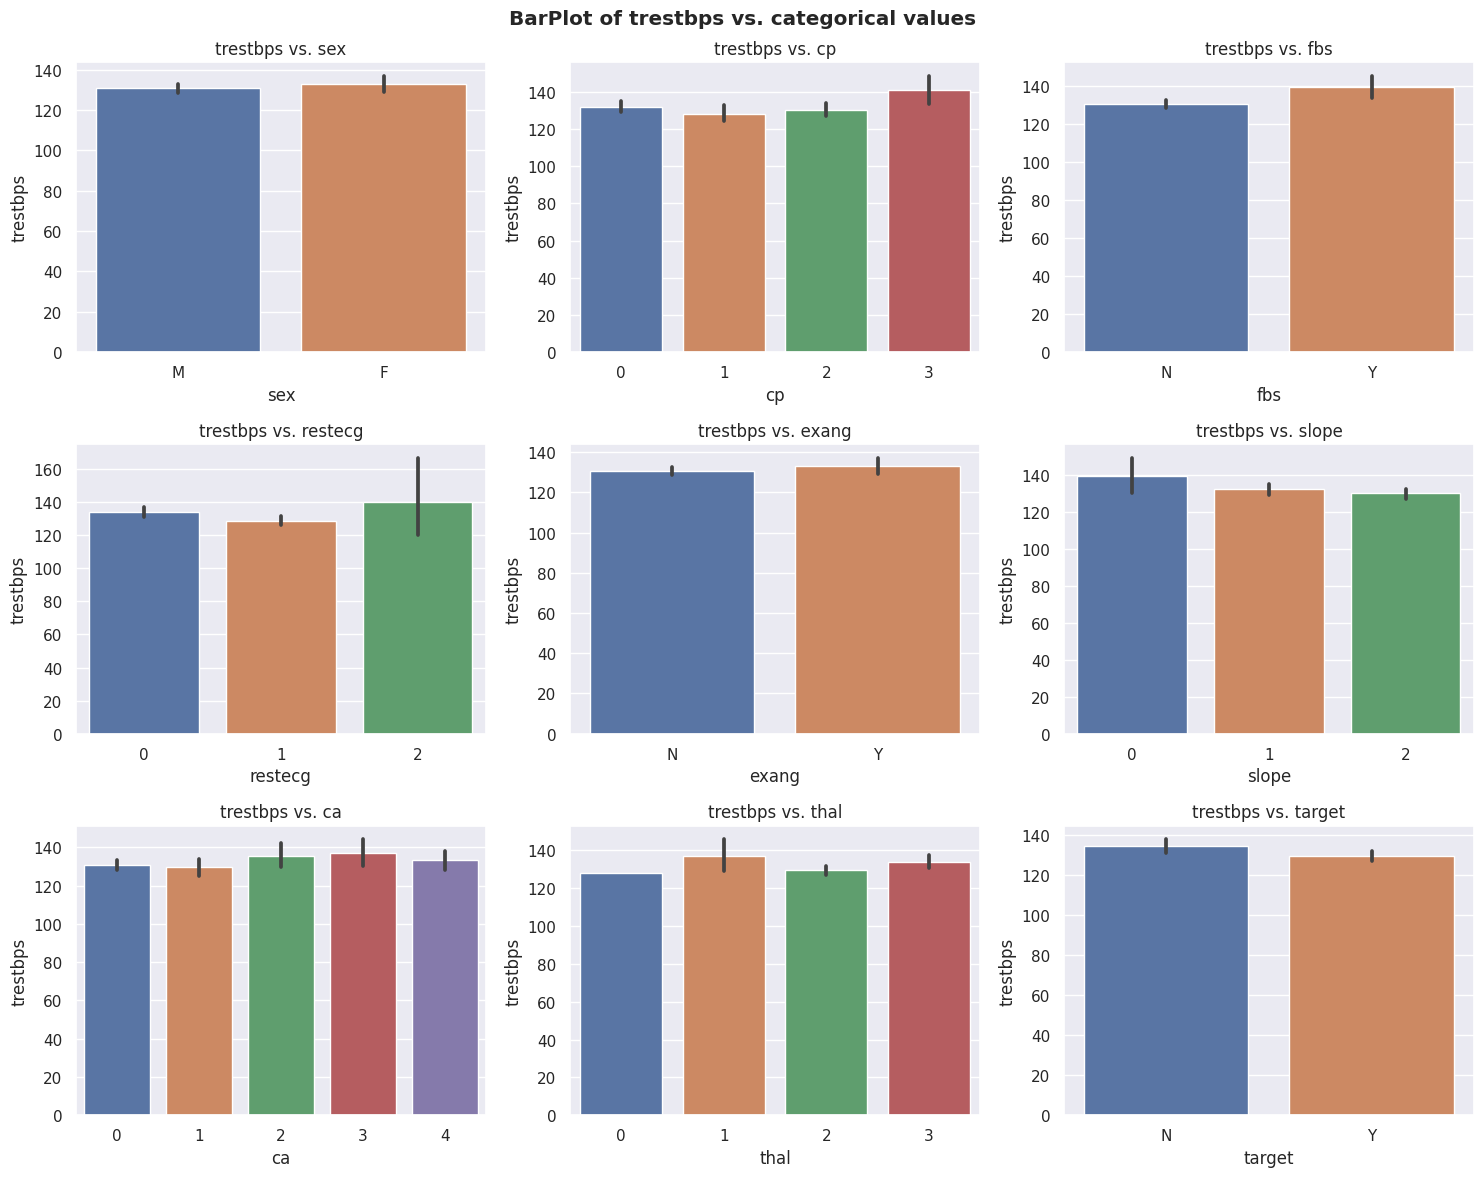

In [45]:
# trestbps vs. Categorical Values

sns.set(style='darkgrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.barplot(x=cat_value, y='trestbps', data=data, ax=axes[i])
    axes[i].set_title(f"trestbps vs. {cat_value}")

plt.suptitle("BarPlot of trestbps vs. categorical values", fontweight='bold')
plt.tight_layout()
plt.show()

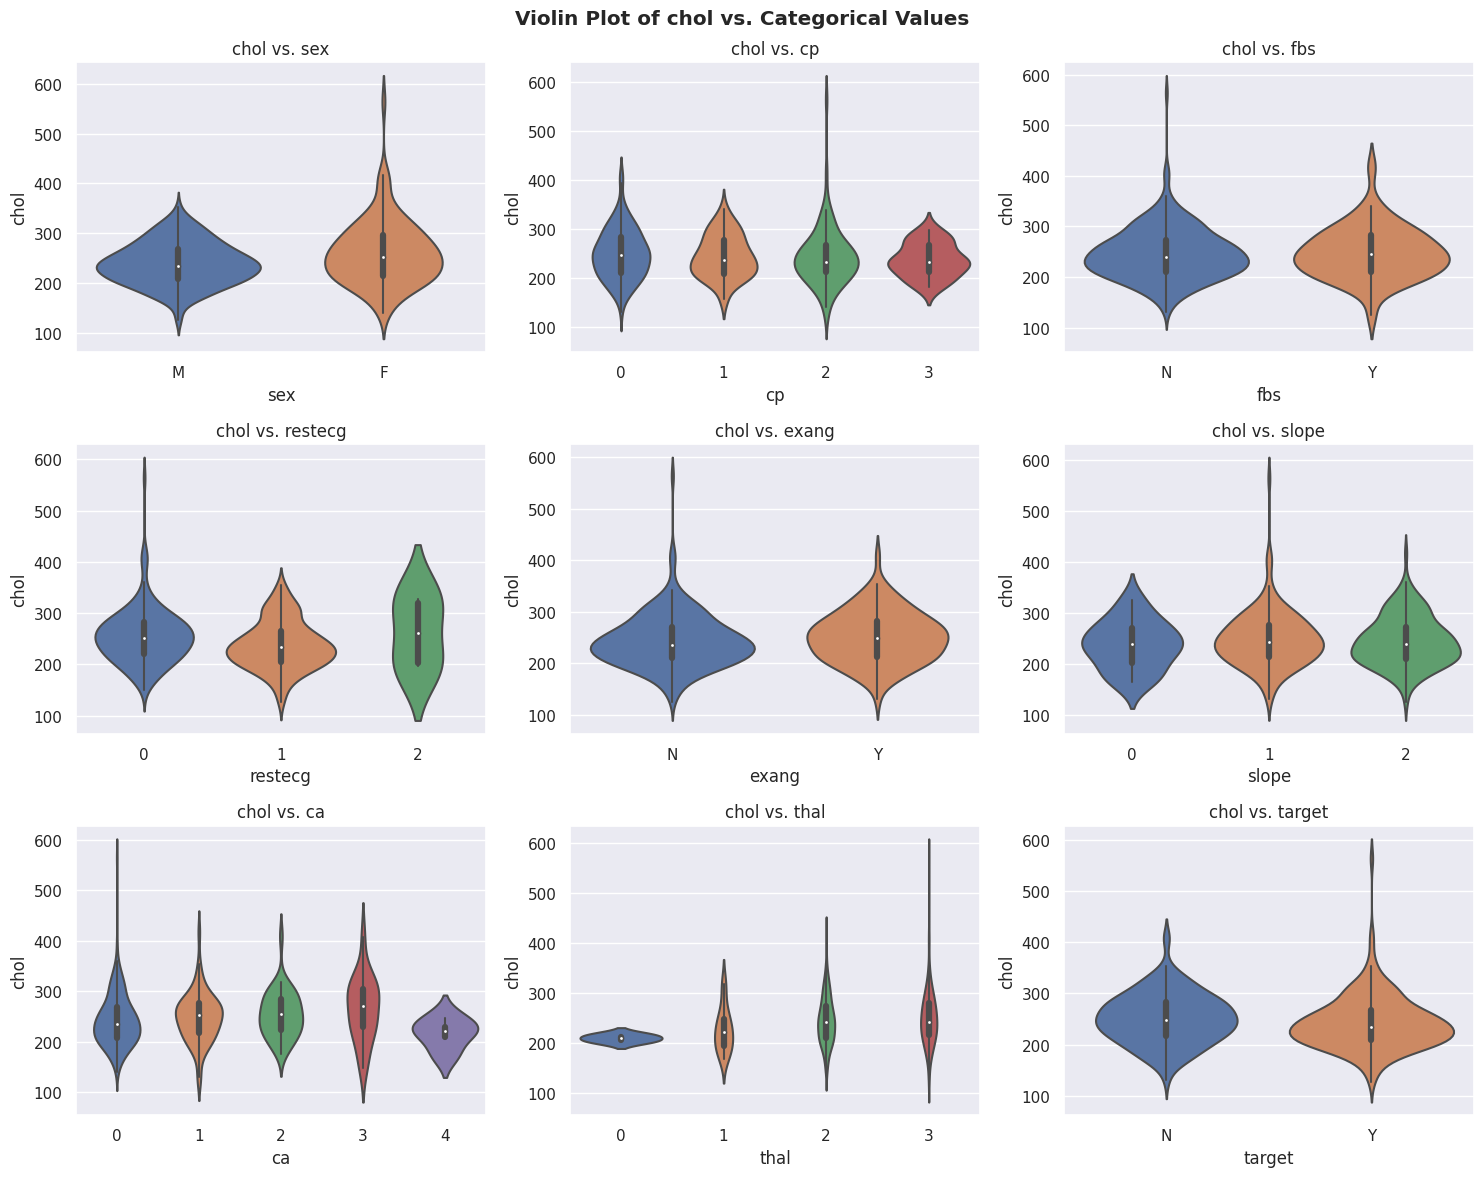

In [46]:
# chol vs. Categorical Value

sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.violinplot(x=cat_value, y='chol', data=data, ax=axes[i])
    axes[i].set_title(f"chol vs. {cat_value}")
    
plt.suptitle("Violin Plot of chol vs. Categorical Values", fontweight='bold')
plt.tight_layout()
plt.show()

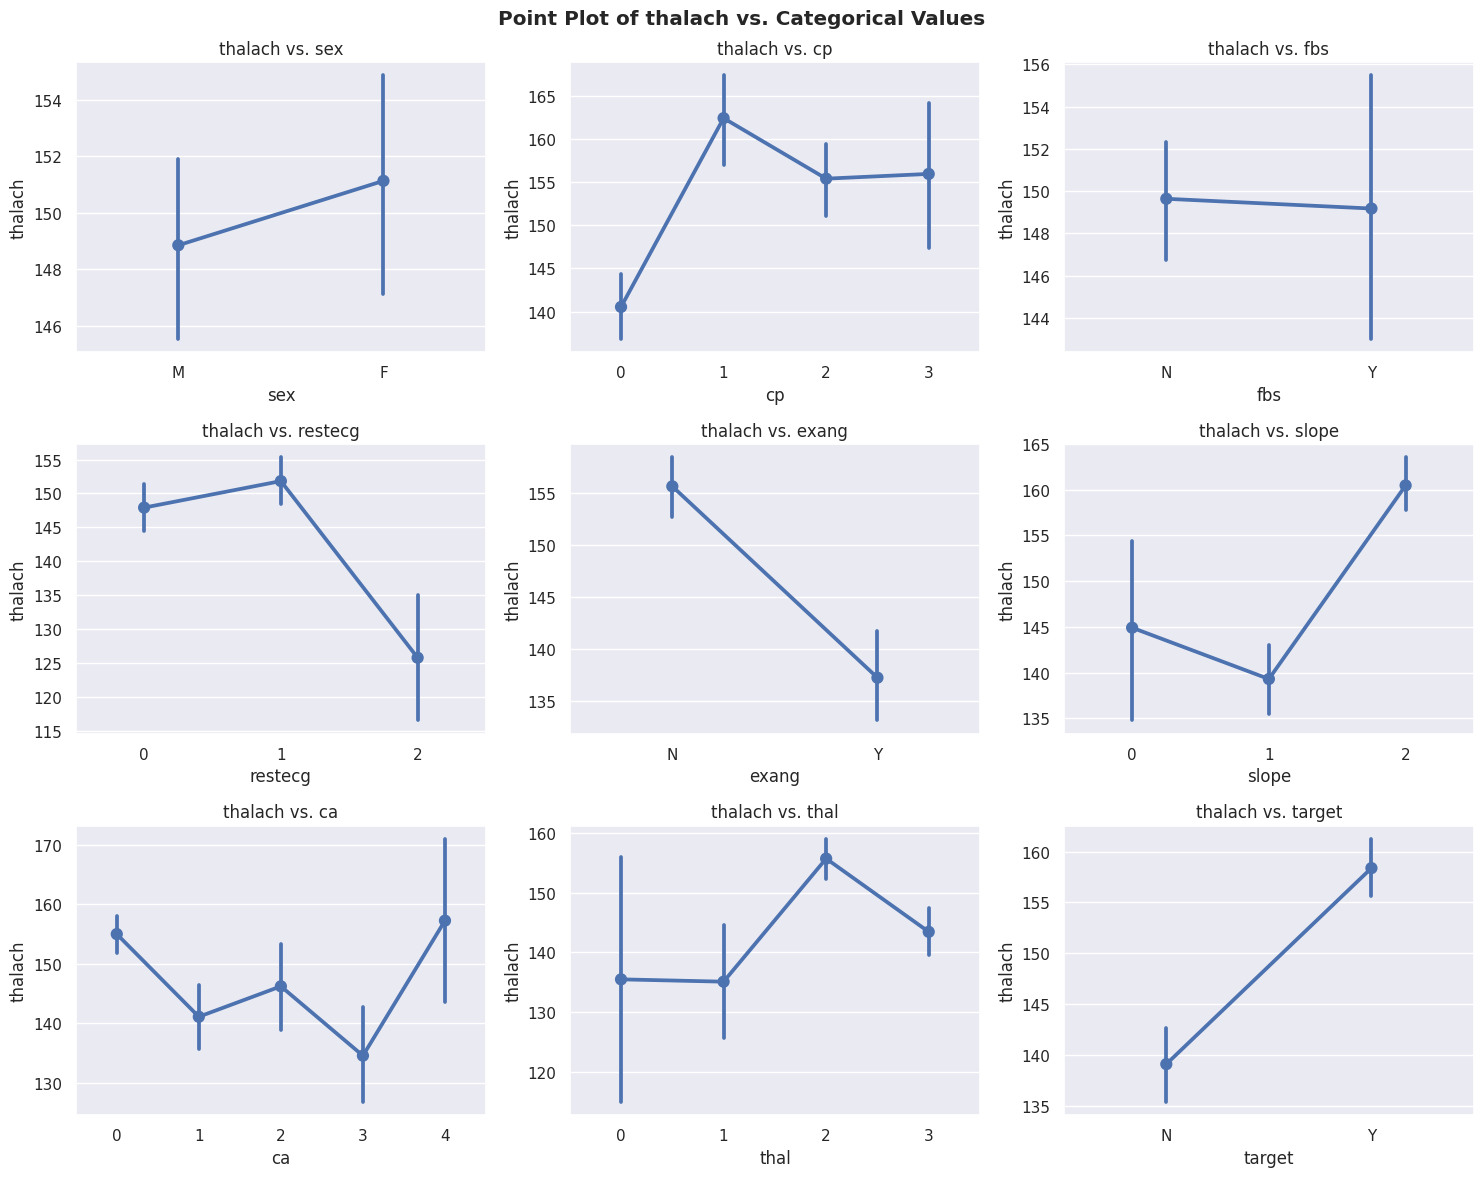

In [47]:
# thalach vs. Categorical values

sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.pointplot(x=cat_value, y='thalach', data=data, ax=axes[i])
    axes[i].set_title(f"thalach vs. {cat_value}")
    
plt.suptitle("Point Plot of thalach vs. Categorical Values", fontweight='bold')
plt.tight_layout()
plt.show()

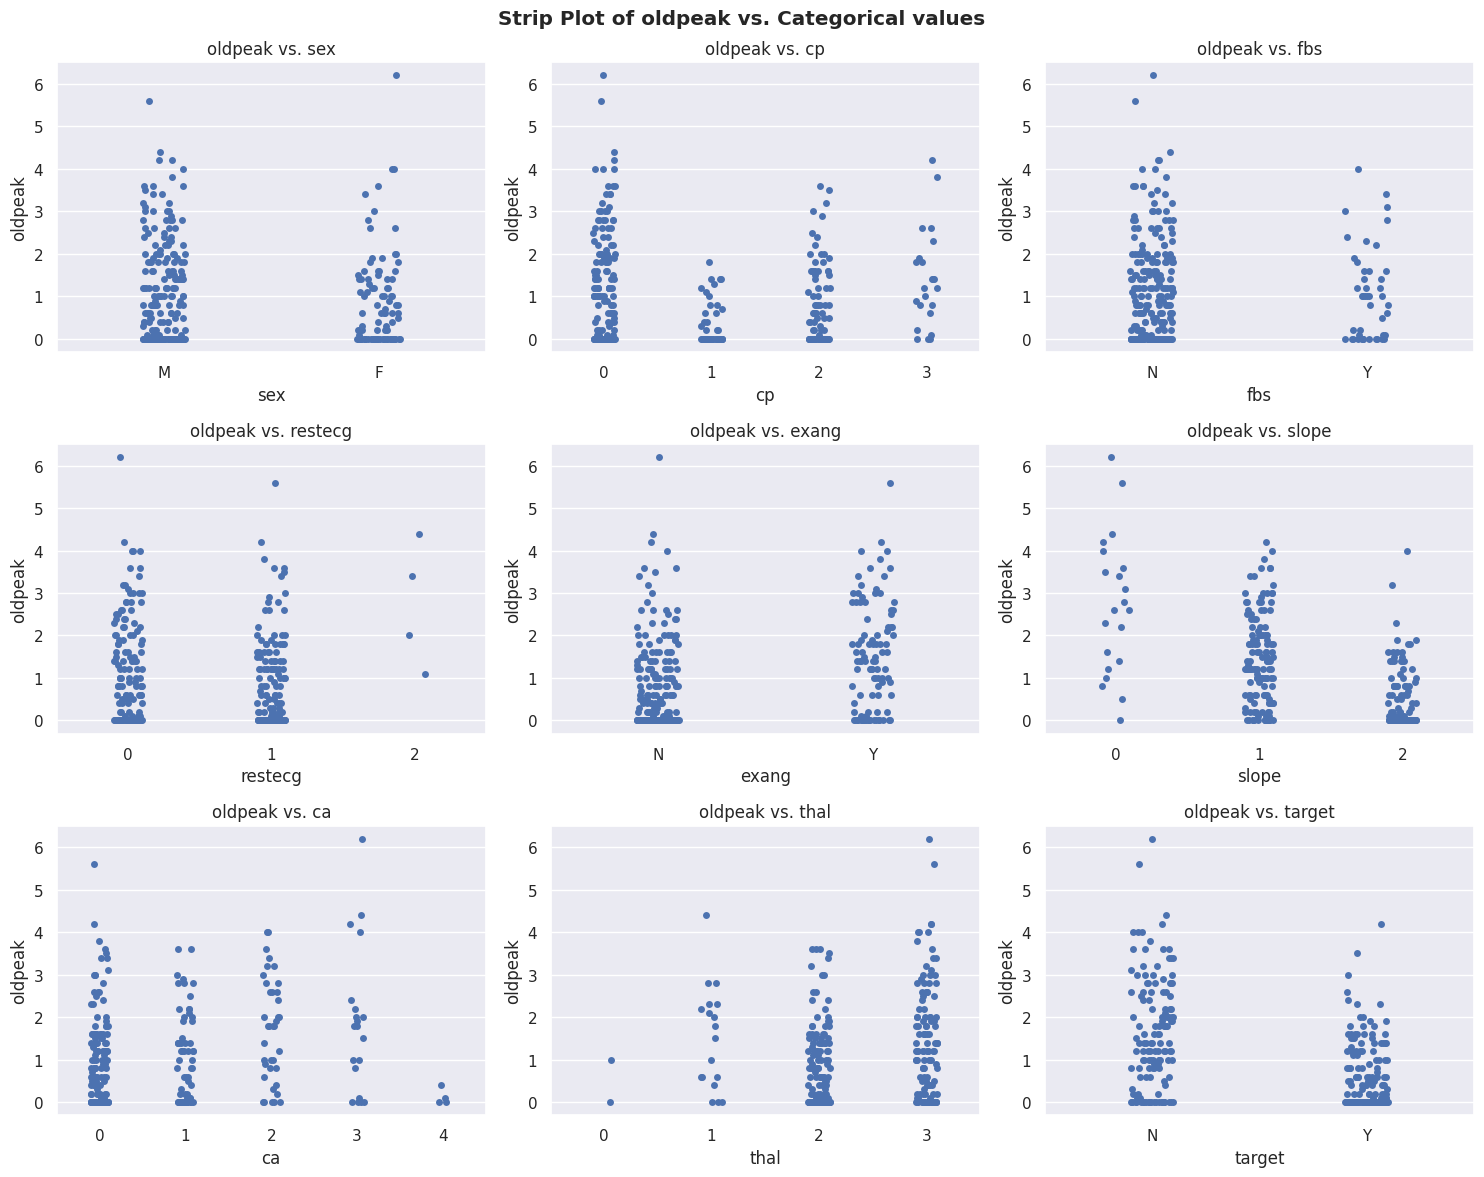

In [48]:
# oldpeak vs. categorical value

sns.set(style='darkgrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.stripplot(x=cat_value, y='oldpeak', data=data, jitter=True, ax=axes[i])
    axes[i].set_title(f"oldpeak vs. {cat_value}")
    
plt.suptitle("Strip Plot of oldpeak vs. Categorical values", fontweight='bold')
plt.tight_layout()
plt.show()

In [49]:
numerical_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [50]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Exploring the Relationship Between Categorical Variables and Heart Disease (Target)

In [51]:
new_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

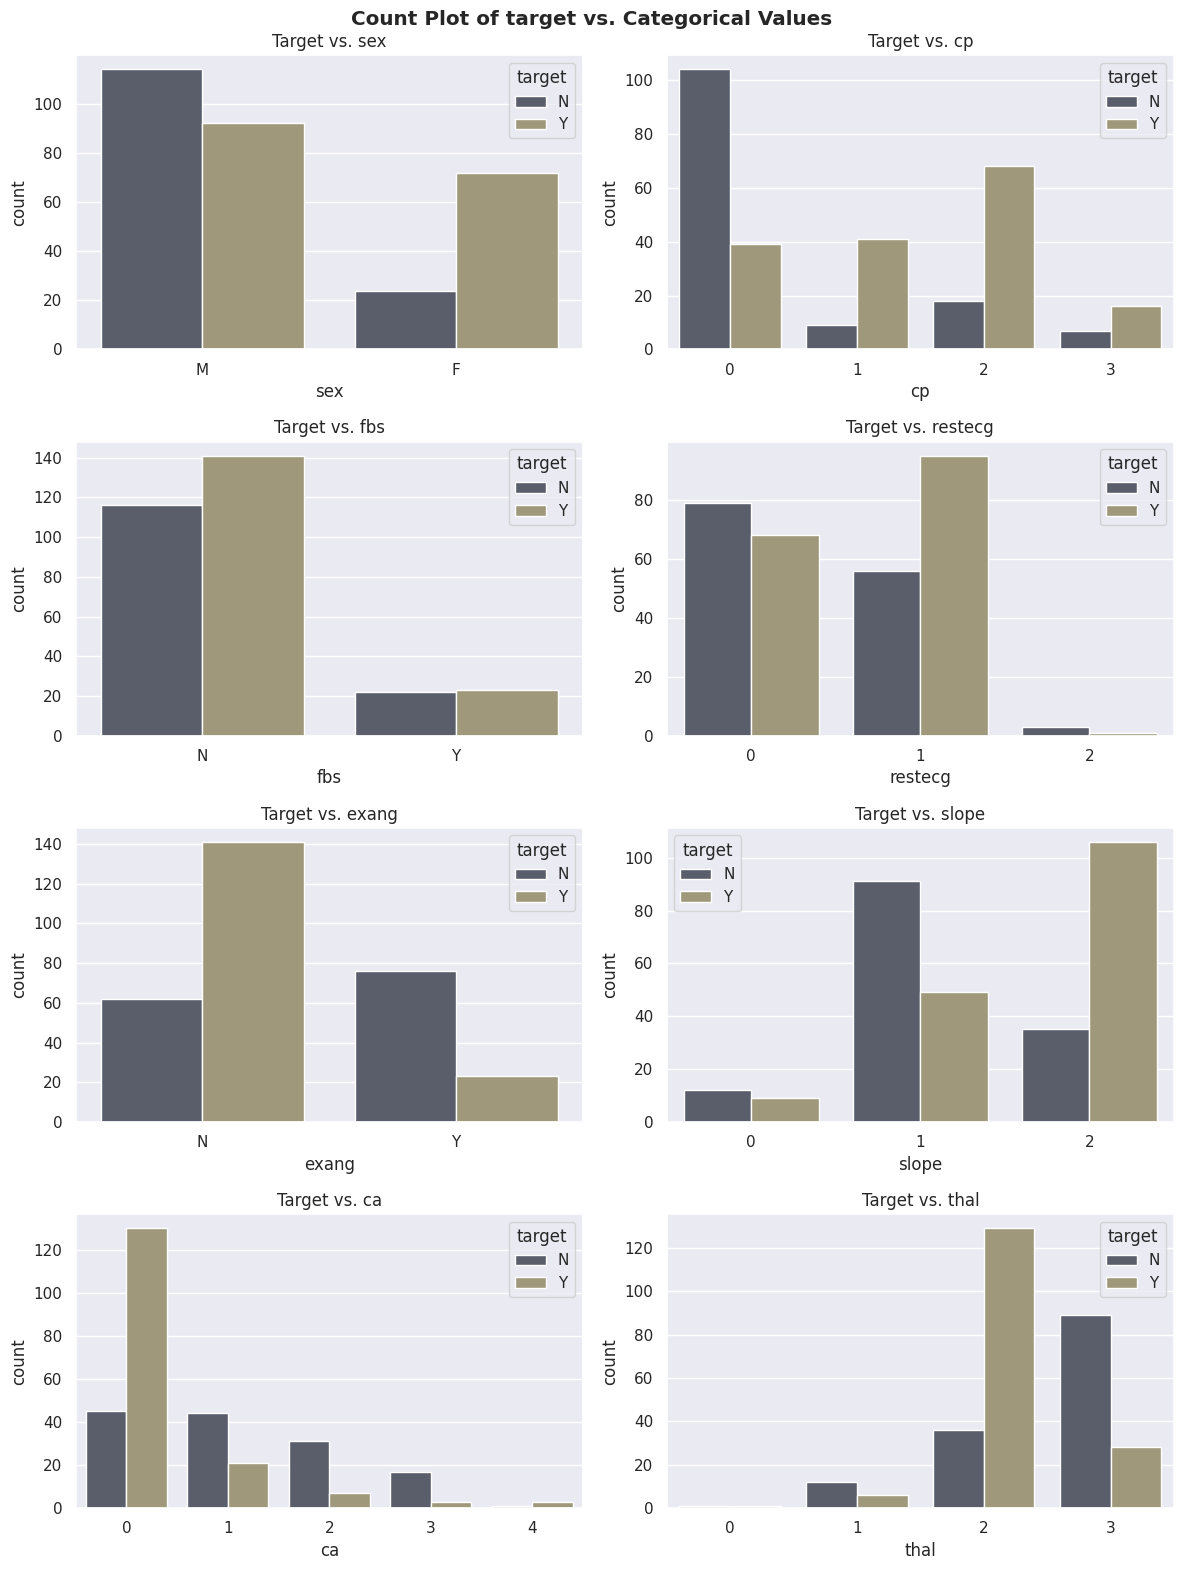

In [52]:
# target vs. Categorical Values

sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16))
axes = axes.flatten()

for i, cat in enumerate(new_categorical):
    sns.countplot(x=cat, hue='target', data=data, ax=axes[i], palette='cividis')
    axes[i].set_title(f"Target vs. {cat}")
    
plt.suptitle("Count Plot of target vs. Categorical Values", fontweight='bold')
plt.tight_layout()
plt.show()

# Visualizing Relationships between numerical variables

In [53]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [54]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [55]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


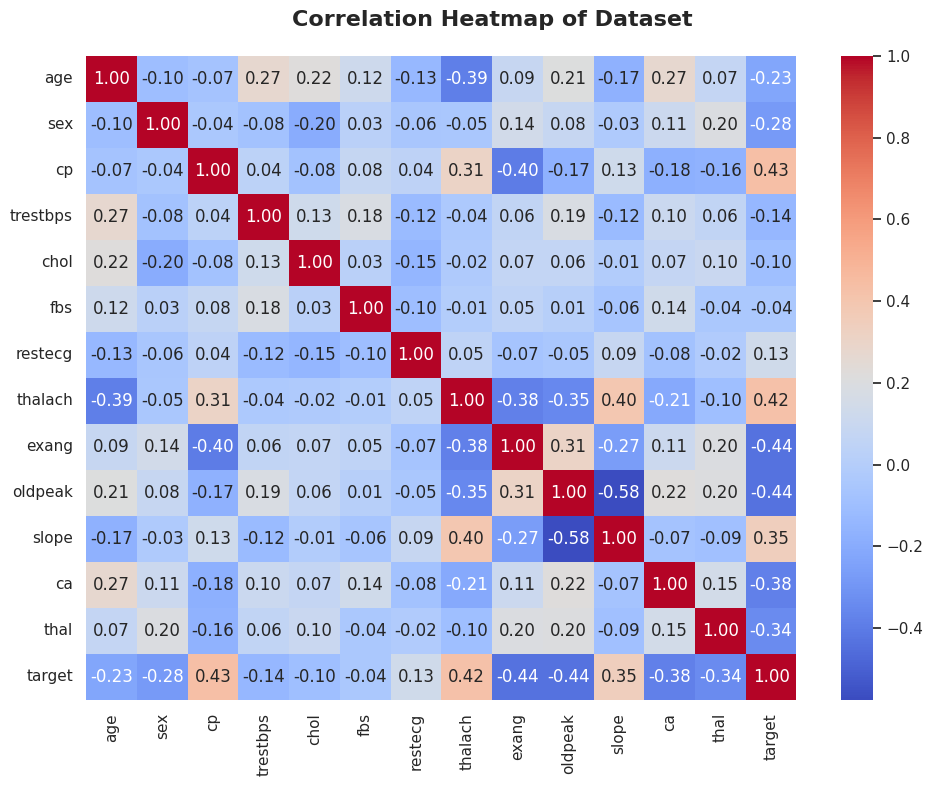

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle("Correlation Heatmap of Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Overall Insights:

1. **Identification of Outliers:**
   - Visualizations highlight the presence of numerous outliers, suggesting that there might be unusual or extremely high/low values in some variables. Further investigation is crucial for understanding their impact on our analysis.

2. **Gender Disparities in Resting Blood Pressure:**
   - Female individuals exhibit higher resting blood pressure compared to males. This observation prompts a closer examination of the factors contributing to this gender-specific difference in blood pressure levels.

3. **Cholesterol Levels and Heart Disease Risk:**
   - Cholesterol levels ranging from 400 to 600 are significant outliers. Some females exhibit extremely high values around 400, which are considered extreme. These high cholesterol levels are linked to an increased likelihood of heart disease. It's vital to take steps to manage cholesterol, particularly when it reaches such elevated levels.

4. **Gender Disparity in Heart Disease Occurrence:**
   - The heart disease is notably higher in men than in women. Investigating the factors contributing to this gender disparity could provide valuable insights into cardiovascular health differences.

5. **Impact of Fasting Blood Sugar Levels:**
   - Extremely low fasting blood sugar levels may indicate an increased risk of heart disease. Understanding the relationship between blood sugar levels and cardiovascular health is crucial for preventive measures.

6. **Associations with Resting Electrocardiographic Results (Restecg), CA Type, and Thal Type:**
   - Noteworthy associations exist between heart disease and Restecg type 2, CA type 4, and Thal type 0. These patterns need more investigation to understand if there are any health issues linked to or causing heart disease.

7. **Exercise-Induced Angina and Heart Disease:**
   - Individuals who did not experience exercise-induced angina previously are now showing signs of heart disease. This correlation emphasizes the importance of understanding the impact of exercise-induced angina on heart health.

8. **Median Age of Heart Disease Onset:**
   - The median age for developing heart disease falls within the range of 50-52 years. This insight emphasizes the significance of age as a potential risk factor, prompting age-specific interventions and screenings for cardiovascular health.

These insights give a detailed understanding of different factors that contribute to heart disease and provide valuable information for further investigation and analysis.